In [33]:
import pandas as pd

df = pd.read_csv("jitensha.csv")
df.head(100)

FileNotFoundError: [Errno 2] No such file or directory: 'jitensha.csv'

自転車盗難件数をまとめる

In [7]:
print("\n===== 盗難件数（総数） =====")
print(f"総件数: {len(df)} 件")


===== 盗難件数（総数） =====
総件数: 9943 件


被害者の特徴（年齢・性別など）が分かればまとめる

どの地域で盗難が多いかを示す

どの月が最も多いか

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("jitensha.csv")

date_col = "発生年月日(始期)"

df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

df["month"] = df[date_col].dt.month

month_counts = df["month"].value_counts().sort_index()

print("===== 月別盗難件数 =====")
for m in range(1, 13):
    print(f"{m}月: {month_counts.get(m, 0)}件")

max_month = month_counts.idxmax()
print(f"\n盗難件数が最も多い月: {max_month}月 ({month_counts[max_month]}件)")

FileNotFoundError: [Errno 2] No such file or directory: 'jitensha.csv'

どの時間帯に多いか

===== 1〜24時 + 不明 の件数 =====
1時: 74件
2時: 32件
3時: 23件
4時: 30件
5時: 113件
6時: 333件
7時: 919件
8時: 675件
9時: 411件
10時: 433件
11時: 371件
12時: 508件
13時: 390件
14時: 388件
15時: 473件
16時: 695件
17時: 859件
18時: 875件
19時: 606件
20時: 500件
21時: 413件
22時: 311件
23時: 229件
24時: 0件
不明: 115件


C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py

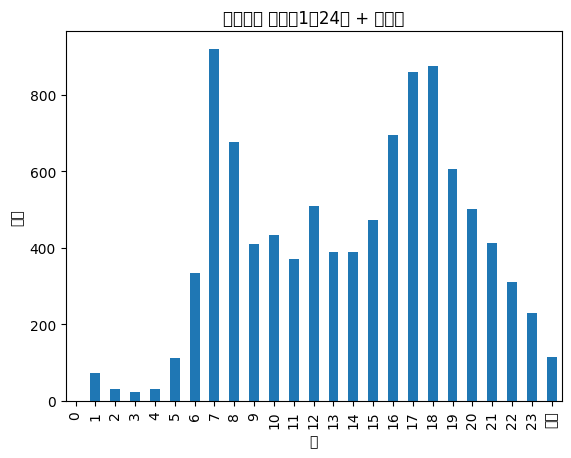

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("000067003.csv")

time_col = "発生時（始期）"

df[time_col] = pd.to_numeric(df[time_col], errors="coerce")

unknown_count = df[time_col].isna().sum()

valid_df = df[df[time_col].between(1, 24)]

hour_counts = valid_df[time_col].value_counts().sort_index()

print("===== 1〜24時 + 不明 の件数 =====")
for h in range(1, 25):
    print(f"{h}時: {hour_counts.get(h, 0)}件")
print(f"不明: {unknown_count}件")

plot_data = hour_counts.reindex(range(0, 24), fill_value=0)
plot_data["不明"] = unknown_count

plot_data.plot(kind="bar")
plt.title("時間帯別 件数（1〜24時 + 不明）")
plt.xlabel("時")
plt.ylabel("件数")
plt.show()


鍵の有無によって盗難件数は変わるのか（Impactのある考察）

その他、興味深い発見があればまとめる